# Front Running Delegator Experiment Tax Parameter Sweep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
from model.sim_setup import SIMULATION_TIME_STEPS
from model.parts.portfolio import Portfolio
from model.config import *
df = pd.read_pickle(r'experiment.p')

# Read in no tax experiment frozen to show A/B
# df = pd.read_pickle(r'experiment_no_tax.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.

running file: sim_setup.py
end of file: sim_setup.py


In [2]:
experiment = simulation_config

In [3]:
df.reset_index(inplace = True)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
0,6,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,4,0,0,0,1,6,1
1,12,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,4,0,0,0,1,6,2
2,18,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474307,4,0,0,0,1,6,3
3,24,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474332,4,0,0,0,1,6,4
4,30,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474426,4,0,0,0,1,6,5


In [5]:
for i in df.indexers:
    print(i['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'].delegators[1])

self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1,

In [6]:
portfolios = df['delegator_portfolios']
portfolio_values = {}
timestep = 0
for i in portfolios:
    for delegator_id, values in i.items():
        if delegator_id not in portfolio_values:
            portfolio_values[delegator_id] = {}
        portfolio_values[delegator_id][timestep] = values
    timestep += 1
delegator_values_df = pd.DataFrame(portfolio_values)
for i in delegator_values_df.columns:
    delegator_values_df[i] = [Portfolio(i) if j != j else j for j in delegator_values_df[i]]
delegator_values_df.head()

,0x698b40f200f6c8145f9dee82c06884152c2f4a86,0xd079f00944d783f631d1af4d6c37039c4479352d,0x3a6f569c1cc6494578a7bcacd0ff0b9ac1859aa6,1,0x527b077ae93cbbd67234cd575a32c20235896d44
271,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
272,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
273,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
274,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
275,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...


In [7]:
# ROI_list = []
# for i, values in delegator_values_df[1].items():
#     # print(values)
#     ROI_list.append(values.ROI)
# plt.plot(delegator_values_df.index, ROI_list)
# plt.title('ROI of Front Running Delegator')

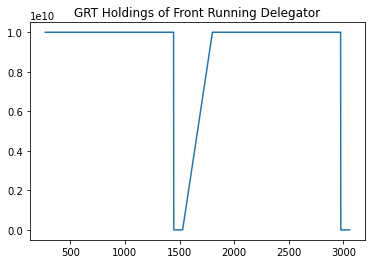

In [8]:
holdings_list = []
for i, values in delegator_values_df[1].items():
    holdings_list.append(values.holdings)
plt.plot(delegator_values_df.index, holdings_list)
plt.title('GRT Holdings of Front Running Delegator');
#plt.ylim(0, 1100000000);

Here we see the front runner delegates all their tokens to the indexer.

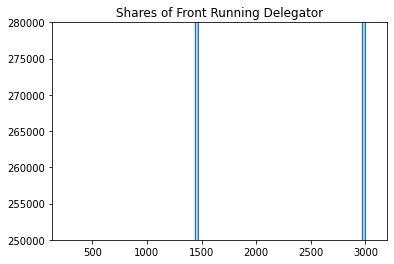

In [9]:
shares_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
plt.plot(delegator_values_df.index, shares_list)
plt.title('Shares of Front Running Delegator')
plt.ylim(250000, 280000);

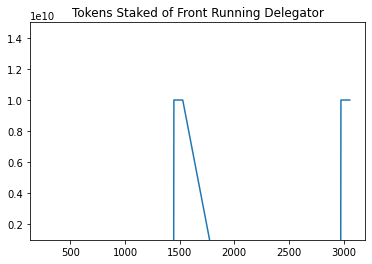

In [10]:
input_tokens_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        input_tokens_list.append(values.indexer_in_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        input_tokens_list.append(0)
plt.plot(delegator_values_df.index, input_tokens_list)
plt.title('Tokens Staked of Front Running Delegator');
plt.ylim(1000000000,15000000000);

Here we see quite a large difference between shares and tokens indicating there being quite a bit of GRT in the pool. 

Text(0.5, 1.0, 'Tokens Staked of Front Running Delegator')

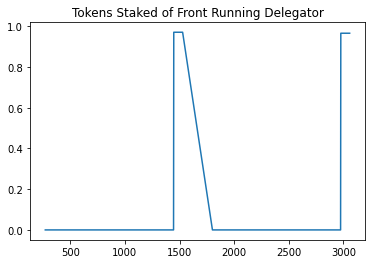

In [11]:
indexer_price_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        indexer_price_list.append(values.indexer_price['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_price_list.append(0)
plt.plot(delegator_values_df.index, indexer_price_list)
plt.title('Tokens Staked of Front Running Delegator')
#plt.ylim(250000,280000);

Here we see the price that the delegator gets is quite low when they delegate. 

In [12]:
# for i, values in delegator_values_df[1].items():
#     if values.indexer_locked_tokens != {}:
#         print(values.indexer_locked_tokens)

#### Front Running Delegator Portfolio

In [13]:
for i in experiment:
    print(i['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4))

0.0000
0.0050


In [14]:
indexer_locked_list = []
shares_list = []
holdings_list = []
for i, values in delegator_values_df[1].items():
    # print(i)
    # print(values)
    # print(values.indexer_locked_tokens)
    if values.indexer_shares != {}:
        print('got_shares ',i, ' values.indexer_shares ', values.indexer_shares)
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
    if values.indexer_locked_tokens != {}:
        print('got_locked tokens ',i, ' values.indexer_locked_tokens ', values.indexer_locked_tokens)
        indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_locked_list.append(0)
    if values.holdings != {}:
        print('got holdings ',i, ' values.holdings ', values.holdings)
        
        holdings_list.append(values.holdings)
    else:
        indexer_locked_list.append(0)

got holdings  271  values.holdings  10000000000
got holdings  272  values.holdings  10000000000
got holdings  273  values.holdings  10000000000
got holdings  274  values.holdings  10000000000
got holdings  275  values.holdings  10000000000
got holdings  276  values.holdings  10000000000
got holdings  277  values.holdings  10000000000
got holdings  278  values.holdings  10000000000
got holdings  279  values.holdings  10000000000
got holdings  280  values.holdings  10000000000
got holdings  281  values.holdings  10000000000
got holdings  282  values.holdings  10000000000
got holdings  283  values.holdings  10000000000
got holdings  284  values.holdings  10000000000
got holdings  285  values.holdings  10000000000
got holdings  286  values.holdings  10000000000
got holdings  287  values.holdings  10000000000
got holdings  288  values.holdings  10000000000
got holdings  289  values.holdings  10000000000
got holdings  290  values.holdings  10000000000
got holdings  291  values.holdings  1000

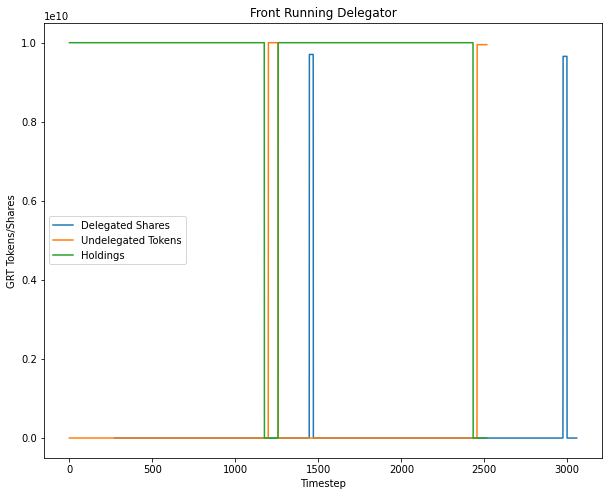

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(delegator_values_df.index, shares_list,indexer_locked_list)
plt.plot(holdings_list)
plt.legend(['Delegated Shares','Undelegated Tokens', 'Holdings']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens/Shares')
plt.title('Front Running Delegator')
plt.show()
# print(holdings_list)

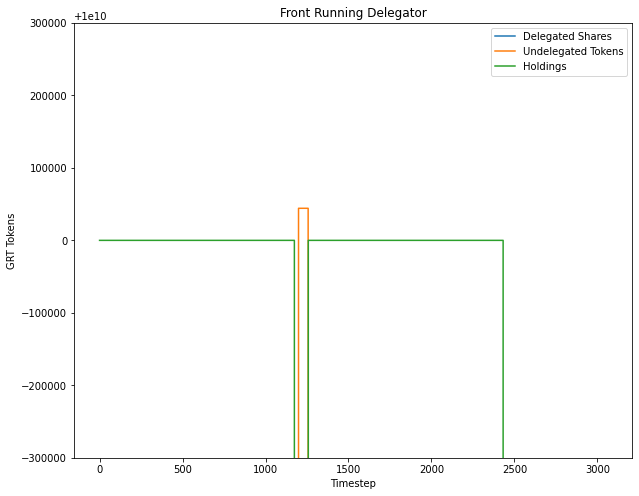

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(delegator_values_df.index, shares_list,indexer_locked_list)
plt.plot(holdings_list)
plt.legend(['Delegated Shares','Undelegated Tokens', 'Holdings']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
plt.ylim(10000000000-300000,10000000000+300000)
plt.title('Front Running Delegator')
plt.show()

In [17]:
indexer_price_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        indexer_price_list.append(values.indexer_price['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_price_list.append(1)

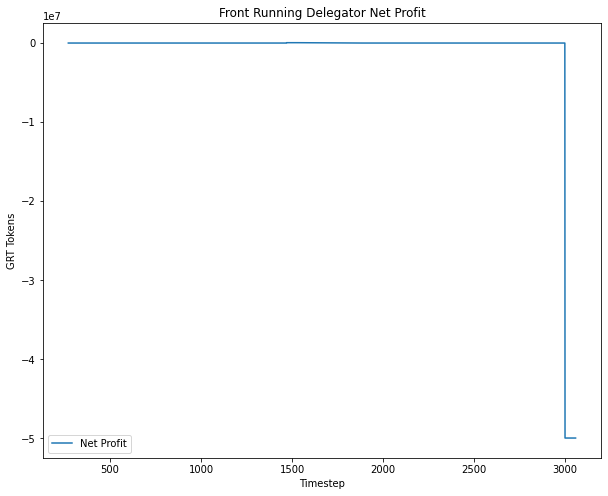

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [18]:
holdings_list = [float(x) for x in holdings_list]
indexer_locked_list = [float(x) for x in indexer_locked_list]
shares_list = [float(x) for x in shares_list]
indexer_price_list = [float(x) for x in indexer_price_list]
shares_value = [b_i / a_i for a_i, b_i in zip(indexer_price_list, shares_list)]
# print(indexer_locked_list[0])
net_profit = [a_i + b_i + c_i - holdings_list[0] for a_i, b_i, c_i in zip(indexer_locked_list, holdings_list, shares_value)]
# [print(type(a_i), type(b_i), type(c_i)) for a_i, b_i, c_i in zip(indexer_locked_list, holdings_list, shares_value)]
# net_profit = [a_i + b_i - holdings_list[0] for a_i, b_i in zip(indexer_locked_list, holdings_list)]

plt.figure(figsize=(10, 8))
plt.plot(delegator_values_df.index, net_profit)
# plt.plot(holdings_list)
plt.legend(['Net Profit']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
# plt.ylim(10000000000-300000,10000000000+300000)
plt.title('Front Running Delegator Net Profit')
plt.show()
print(shares_list)

In [20]:
diff_params_dfs = {}
for i in df['subset'].unique():
    diff_params_dfs[i] = df[df['subset'] == i]
delegator_values_df = {}
for i in diff_params_dfs.keys():
    delegator_values_df[i] = {}
    portfolios = diff_params_dfs[i]['delegator_portfolios']
    timestep = 0
    for j in portfolios:
        for delegator_id, values in j.items():
            if delegator_id not in delegator_values_df[i]:
                delegator_values_df[i][delegator_id] = {}
            delegator_values_df[i][delegator_id][timestep] = values
        timestep += 1
    delegator_values_df[i] = pd.DataFrame(delegator_values_df[i])

    for j in delegator_values_df[i].columns:
        delegator_values_df[i][j] = [Portfolio(j) if k != k else k for k in delegator_values_df[i][j]]

delegator_values_df[0][1].tail()

1524    <class 'model.parts.portfolio.Portfolio'>: {'i...
1525    <class 'model.parts.portfolio.Portfolio'>: {'i...
1526    <class 'model.parts.portfolio.Portfolio'>: {'i...
1527    <class 'model.parts.portfolio.Portfolio'>: {'i...
1528    <class 'model.parts.portfolio.Portfolio'>: {'i...
Name: 1, dtype: object

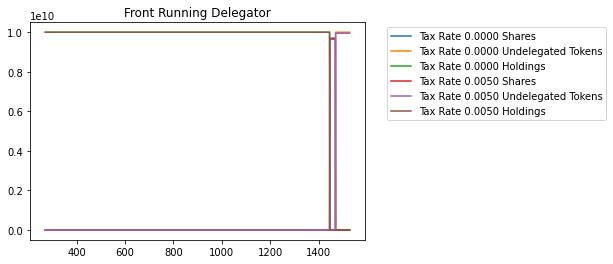

In [21]:
for i,j in enumerate(experiment):
    plot_df = delegator_values_df[i]
    shares_list = []
    indexer_locked_list = []
    holdings_list = []
    # label_one = j['M']['delegation_unbonding_period_epochs']
    label_two = j['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    for i, values in delegator_values_df[i][1].items():
        if values.indexer_shares != {}:
            shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            shares_list.append(0)
        if values.indexer_locked_tokens != {}:
            indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            indexer_locked_list.append(0)
        if values.holdings != {}:
            holdings_list.append(values.holdings)
        else:
            holdings_list.append(0)            
    plt.plot(plot_df.index, shares_list, 
            label = f'Tax Rate {label_two} Shares')
    plt.plot(plot_df.index, indexer_locked_list, 
            label = f'Tax Rate {label_two} Undelegated Tokens')
    plt.plot(plot_df.index, holdings_list, 
            label = f'Tax Rate {label_two} Holdings')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Front Running Delegator')



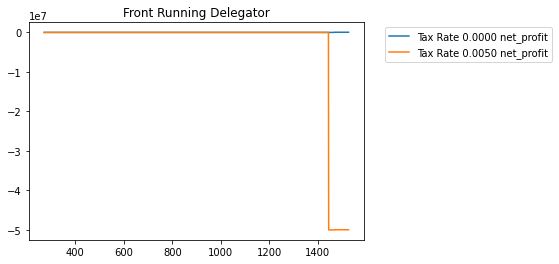

In [26]:
for i,j in enumerate(experiment):
    plot_df = delegator_values_df[i]
    shares_list = []
    indexer_locked_list = []
    holdings_list = []
    # label_one = j['M']['delegation_unbonding_period_epochs']
    label_two = j['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    for i, values in delegator_values_df[i][1].items():
        if values.indexer_shares != {}:
            shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            shares_list.append(0)
        if values.indexer_locked_tokens != {}:
            indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            indexer_locked_list.append(0)
        if values.holdings != {}:
            holdings_list.append(values.holdings)
        else:
            holdings_list.append(0)            

    holdings_list = [float(x) for x in holdings_list]
    indexer_locked_list = [float(x) for x in indexer_locked_list]
    shares_list = [float(x) for x in shares_list]
    indexer_price_list = [float(x) for x in indexer_price_list]
    shares_value = [b_i / a_i for a_i, b_i in zip(indexer_price_list, shares_list)]
    # print(indexer_locked_list[0])
    net_profit = [a_i + b_i + c_i - holdings_list[0] for a_i, b_i, c_i in zip(indexer_locked_list, holdings_list, shares_value)]

    plt.plot(plot_df.index, net_profit, 
            label = f'Tax Rate {label_two} net_profit')

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Front Running Delegator')

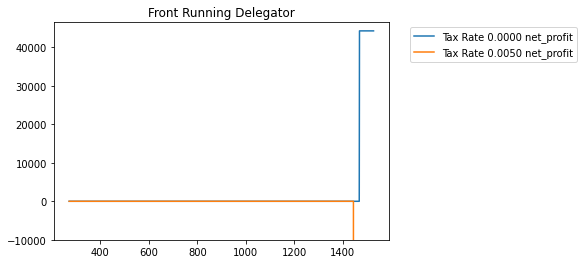

In [31]:
for i,j in enumerate(experiment):
    plot_df = delegator_values_df[i]
    shares_list = []
    indexer_locked_list = []
    holdings_list = []
    # label_one = j['M']['delegation_unbonding_period_epochs']
    label_two = j['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    for i, values in delegator_values_df[i][1].items():
        if values.indexer_shares != {}:
            shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            shares_list.append(0)
        if values.indexer_locked_tokens != {}:
            indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            indexer_locked_list.append(0)
        if values.holdings != {}:
            holdings_list.append(values.holdings)
        else:
            holdings_list.append(0)            

    holdings_list = [float(x) for x in holdings_list]
    indexer_locked_list = [float(x) for x in indexer_locked_list]
    shares_list = [float(x) for x in shares_list]
    indexer_price_list = [float(x) for x in indexer_price_list]
    shares_value = [b_i / a_i for a_i, b_i in zip(indexer_price_list, shares_list)]
    # print(indexer_locked_list[0])
    net_profit = [a_i + b_i + c_i - holdings_list[0] for a_i, b_i, c_i in zip(indexer_locked_list, holdings_list, shares_value)]

    plt.plot(plot_df.index, net_profit, 
            label = f'Tax Rate {label_two} net_profit')

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.ylim(-10000)
    plt.title('Front Running Delegator')

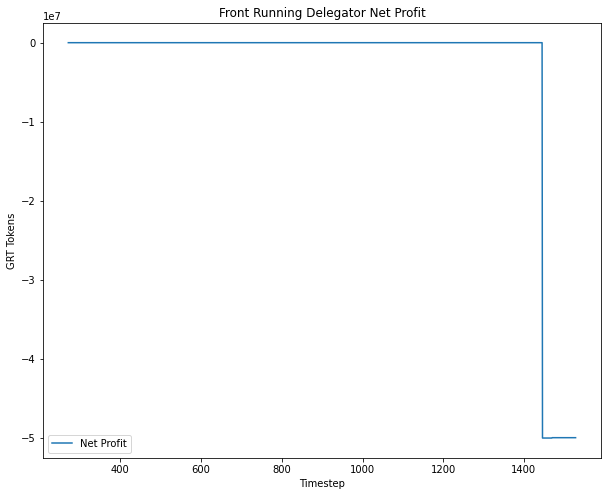

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(plot_df.index, net_profit)
# plt.plot(holdings_list)
plt.legend(['Net Profit']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
# plt.ylim(10000000000-300000,10000000000+300000)
plt.title('Front Running Delegator Net Profit')
plt.show()
print(shares_list)

In [ ]:
# # analysis of agent
# for j in range(10):
#     for i in agent_df['agent1_state'][j]:
#         print(i)

In [ ]:
# for j in range(10):
#     for i in agent_df['agent1_inputs'][j]:
#         print(i)

In [ ]:
# for j in range(10):
#     for i in agent_df['agent1_states'][j]:
#         print(i)

In [ ]:
# for j in range(10):
#     for i in agent_df['agent1_strategies'][j]:
#         print(i)

In [ ]:
# for j in range(10):
#     for i in agent_df['agent1_plans'][j]:
#         print(i)

In [ ]:
# for j in range(10):
#     for i in agent_df['agent1_outputs'][j]:
#         print(i)